In [1]:
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os 
# os.chdir('/content/drive/MyDrive/Colab Notebooks/Video Games Rating')

In [4]:
video_game = pd.read_csv('Video_games_esrb_rating.csv')

In [5]:
video_game.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [6]:
test_data = pd.read_csv('test_esrb.csv')

In [7]:
video_game.esrb_rating.unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

In [8]:
# video_game['esrb_rating'] = video_game.esrb_rating.map({'RP':0,'EC':1,'E':2,'E 10+':3,'ET':4,'T':5,'M':6,'A':7})

In [9]:
video_game

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [10]:
video_game.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

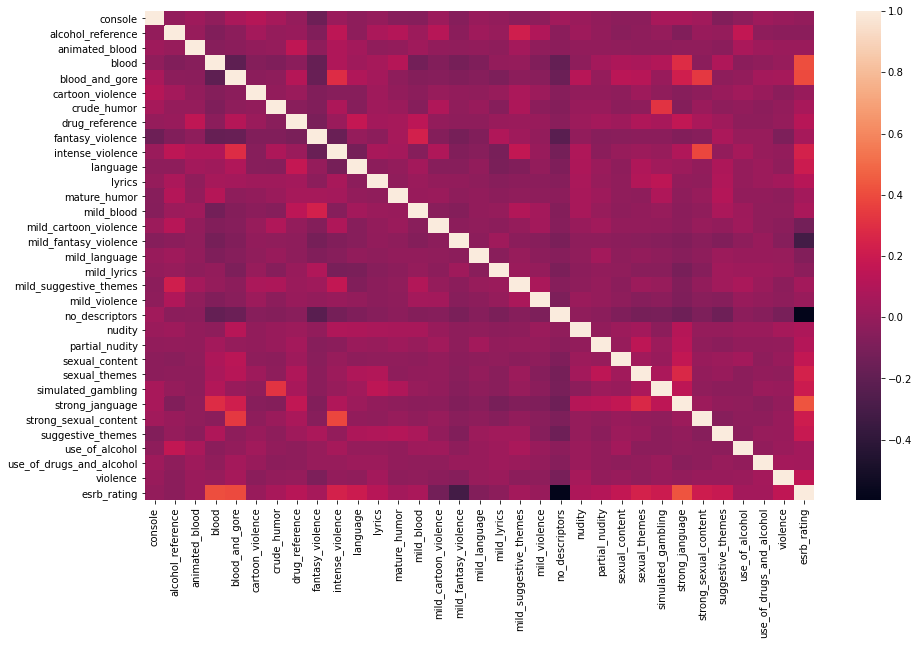

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
heat_m = video_game.esrb_rating.map({'RP':0,'EC':1,'E':2,'E 10+':3,'ET':4,'T':5,'M':6,'A':7})
heatdf = video_game.drop('esrb_rating',axis=1)
heatdf['esrb_rating'] = heat_m
plt.figure(figsize = [15,9])
sns.heatmap(heatdf.corr())
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
video_game = video_game.drop(['title','no_descriptors','mild_fantasy_violence'],axis=1)

In [14]:
x = video_game.iloc[:,:-1]
y = video_game.iloc[:,-1]

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.2,random_state = 0)

## prediction models

### Using Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [17]:
DC = DecisionTreeClassifier(criterion = 'entropy')

In [18]:
DC.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [19]:
Y_pred = DC.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score
round(accuracy_score(ytest,Y_pred),4)

0.847

### Using Multinomial Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [22]:
MNB.fit(xtrain,ytrain)
y_pred = MNB.predict(xtest)

In [23]:
round(accuracy_score(ytest,Y_pred),4)

0.847

### Using Random Forest Classifier


In [24]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [25]:
 RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
y_pred = RFC.predict(xtest)

In [27]:
round(accuracy_score(ytest,y_pred),4)

0.8522

## Using Random forest Classifier on test data

In [28]:
X_TEST = test_data.drop(['esrb_rating','title','no_descriptors','mild_fantasy_violence'],axis=1)
y_TEST = test_data.esrb_rating

In [29]:
y_TEST.unique()

array(['T', 'E', 'ET', 'M'], dtype=object)

In [30]:
Random_forest = RandomForestClassifier('entropy')

In [31]:
from sklearn.model_selection import GridSearchCV
params_to_test = {
    'n_estimators':[2,3,5,7],
}
CSV = GridSearchCV(Random_forest,param_grid=params_to_test,cv=10, scoring='f1_macro', n_jobs=4)

In [32]:
CSV.fit(x,y)
Y_PRED = CSV.predict(X_TEST)

In [33]:
accuracy_score(y_TEST,Y_PRED)

0.842

### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(ytest,y_pred)

In [35]:
print('True positive',tp)
print('True Negitive', tn)
print('False Positive', fp)
print('False Negitive', fn)

True positive [  1  20  10 100]
True Negitive [83  3  0  0]
False Positive [ 2 73  0 10]
False Negitive [ 0  0 67 10]


### Using neural networks for the predictions

In [36]:
import tensorflow
import keras

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
Y_TEST = le.fit_transform(y_TEST)

In [38]:
len(X_TEST.columns)

30

In [48]:
keras.backend.clear_session()
model = keras.Sequential([
                          keras.layers.Dense(200,activation='relu',kernel_initializer='random_normal',input_shape=[30]),
                          keras.layers.Dense(100,activation='relu',kernel_initializer='random_normal'),
                          keras.layers.Dense(4,activation='softmax')
])

In [49]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x,y,batch_size=32,epochs=200,verbose=0,validation_split=0.2,validation_data=X_TEST)

In [51]:
new = model.evaluate(X_TEST,Y_TEST)
new

16/16 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8220


[0.47189566493034363, 0.8220000267028809]

In [52]:
model.save("VideoGame_model")
model.save_weights("VideoGame_weights.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: VideoGame_model\assets
